In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Welcome to MapMaker
# 1. Type the name of the excel file of interest into the quotation marks for file_path.
file_path = "randomSky.xlsx"

# 2. Type the letter corresponding to the series these projections are from (H, R, or S)
Series = "R"

In [3]:
# Create the file
File_Name = f"{Series}_Series_Star_Projections"
path = f'./{File_Name}'
os.makedirs(path, exist_ok=True)

try:
    # Print the entire sheet
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    
    df = pd.read_excel(file_path)
    print(df)

except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

      Name         RA        Dec   Mag
0    R0000  16.055418  59.874004  3.87
1    R0001  13.165714 -61.831571  3.21
2    R0002   1.592559  -8.747721  3.23
3    R0003  16.639686 -25.840631  1.26
4    R0004   5.610731  -9.125684  3.54
5    R0005   4.671314 -28.783541  3.27
6    R0006   1.071444  16.315301  2.11
7    R0007  19.339577 -59.701178  3.66
8    R0008  17.045772  12.872946  2.95
9    R0009  21.986826  70.907080  1.79
10   R0010   0.031307   4.232714  3.67
11   R0011   8.221495  35.114498  3.94
12   R0012  14.898801  11.434636  3.51
13   R0013  14.041894 -22.002919  1.98
14   R0014  17.675433 -21.001312  3.88
15   R0015   0.141097  10.501945  3.79
16   R0016  17.190545  81.045297  3.81
17   R0017  10.527638 -52.732292  0.22
18   R0018  22.136505 -20.056410  3.87
19   R0019  16.347044  51.403375  2.05
20   R0020   8.381612  -8.757951  3.72
21   R0021  20.037648  10.530264  3.63
22   R0022   1.461000 -10.627997  3.05
23   R0023  16.287973  30.835952  3.97
24   R0024   9.026242  72

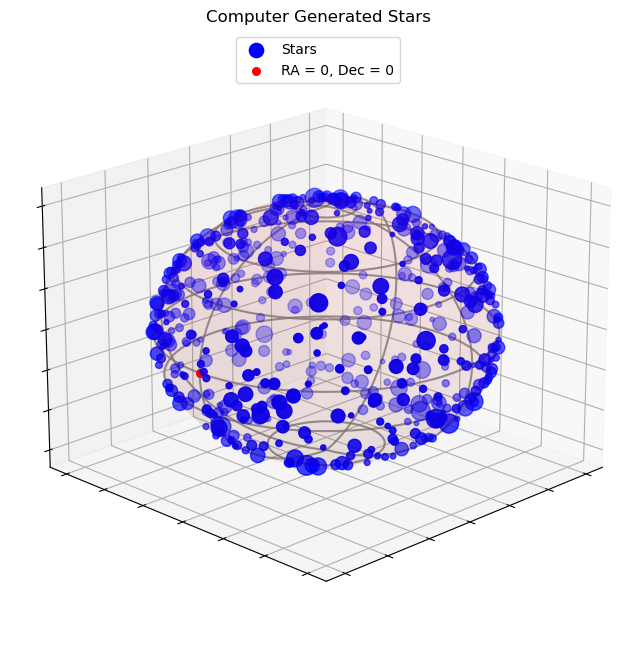

In [4]:
# MapMaker 1: A 3D projection of stars onto the celestial sphere.

df = pd.DataFrame(df)

ra_rad = np.radians(df['RA']*15) 
dec_rad = np.radians(df['Dec'])

# Convert spherical coordinates to Cartesian coordinates (this is just for the python plotting)
x = 3*np.cos(ra_rad) * np.cos(dec_rad)
y = 3*np.sin(ra_rad) * np.cos(dec_rad)
z = 3*np.sin(dec_rad)

#MAGNITUDE/SIZE RELATION SECTION
# Normalize magnitudes to determine the size of the stars
sizes = (df['Mag'] - df['Mag'].min()) / (df['Mag'].max() - df['Mag'].min())
# Define the size scale for the stars
min_size = 200
max_size = 10
# Calculate the size of each star based on its magnitude
star_sizes = min_size + (max_size - min_size) * sizes

#PLOTTING SECTION 2: formatting and additions to the figure
# Plotting on a sphere in Cartesian coordinates
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each point in Cartesian coordinates with size based on magnitude
ax.scatter(x, y, z, color='blue', s=star_sizes, label='Stars')

# Plot the translucent sphere with radius 1 and center at the origin
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = 3*np.outer(np.cos(u), np.sin(v))
y_sphere = 3*np.outer(np.sin(u), np.sin(v))
z_sphere = 3*np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='r', alpha=0.05)

# Plot lines of longitude (meridians)
for ra in np.arange(0, 360, 100):
    ra_rad = np.radians(ra)
    x_line = 3*np.cos(ra_rad) * np.sin(v)
    y_line = 3*np.sin(ra_rad) * np.sin(v)
    z_line = 3*np.cos(v)
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.8)

# Plot lines of latitude (parallels)
for dec in np.arange(-90, 180, 50):
    dec_rad = np.radians(dec)
    x_line = 3*np.cos(u) * np.sin(dec_rad)
    y_line = 3*np.sin(u) * np.sin(dec_rad)
    z_line = 3*np.cos(dec_rad) * np.ones_like(u)
    ax.plot(x_line, y_line, z_line, color='gray', alpha=0.8)

# Plot the red point at RA = 0 and Dec = 0
ax.scatter(3, 0, 0, color='red', s=30, label='RA = 0, Dec = 0')

# Set title
ax.set_title('Computer Generated Stars')

# Adjusting the viewing angle
ax.view_init(elev=20, azim=45)  # Set the elevation and azimuth angles

# Remove axis labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Add legend
ax.legend(loc='upper center')

# Save the figure into desired folder
plt.savefig(f"{path}/3Dprojection.png")

plt.show()

In [6]:
#MapMaker 2a: Dataframe Separation

positive_df = df[df['Dec'] > 0]
negative_df = df[df['Dec'] < 0]

print("Positive Dec DataFrame:")
print(positive_df)

print("\nNegative Dec DataFrame:")
print(negative_df)

Positive Dec DataFrame:
      Name         RA        Dec   Mag
0    R0000  16.055418  59.874004  3.87
6    R0006   1.071444  16.315301  2.11
8    R0008  17.045772  12.872946  2.95
9    R0009  21.986826  70.907080  1.79
10   R0010   0.031307   4.232714  3.67
11   R0011   8.221495  35.114498  3.94
12   R0012  14.898801  11.434636  3.51
15   R0015   0.141097  10.501945  3.79
16   R0016  17.190545  81.045297  3.81
19   R0019  16.347044  51.403375  2.05
21   R0021  20.037648  10.530264  3.63
23   R0023  16.287973  30.835952  3.97
24   R0024   9.026242  72.301720  3.52
25   R0025  10.663385   4.803905  3.66
27   R0027  13.487418  63.351361  3.05
28   R0028   0.483862  38.387217  3.88
30   R0030  17.131675  21.345429  3.69
31   R0031  14.499958  51.196682  1.57
33   R0033  23.733004  40.190134  2.79
36   R0036   3.729345  22.119555  2.62
39   R0039  11.894437   3.868763  3.46
40   R0040  11.097285   3.527447  3.13
41   R0041  14.975393  60.531564  3.01
42   R0042  22.420842   2.217287  3.91
4

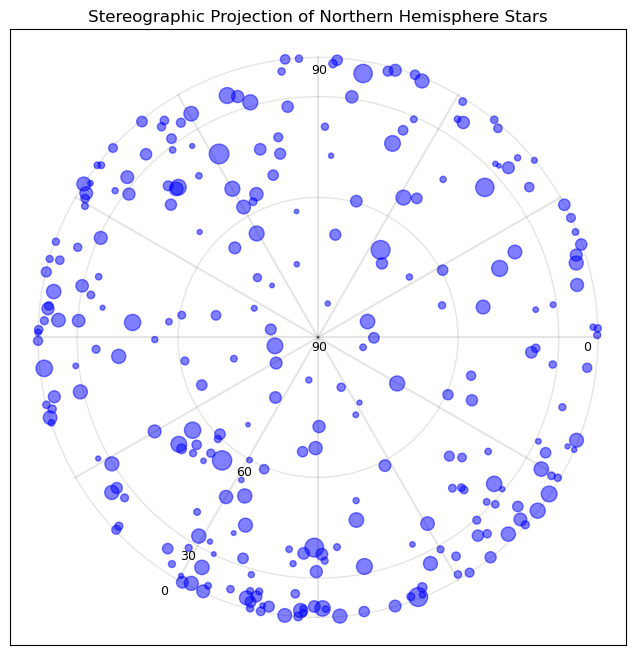

In [7]:
# MapMaker 2b: Stereographic projection for NORTHERN hemisphere

# Convert RA and Dec to radians, then to Cartesian coordinates
ra_rad = np.radians(positive_df['RA']*15)
dec_rad = np.radians(positive_df['Dec'])

x = np.cos(ra_rad) * np.cos(dec_rad)
y = np.sin(ra_rad) * np.cos(dec_rad)

# Define the stereographic projection
center_dec = np.radians(90)  # Center of the circle
edge_dec = np.radians(0)      # Edge of the circle

def stereographic_projection(x, y, center_dec, edge_dec):
    x_proj = x / (1 - np.sin(center_dec) * np.sin(edge_dec))
    y_proj = y / (1 - np.sin(center_dec) * np.sin(edge_dec))
    return x_proj, y_proj

x_proj, y_proj = stereographic_projection(x, y, center_dec, edge_dec)

# Plot the stereographic projection with variable point sizes based on magnitude
# Extracting magnitudes and normalizing them
magnitudes = positive_df['Mag']
min_mag = magnitudes.min()
max_mag = magnitudes.max()
normalized_magnitudes = (magnitudes - min_mag) / (max_mag - min_mag)

# Size range for points
min_size = 10
max_size = 200
point_sizes = min_size + (max_size - min_size) * (1 - normalized_magnitudes)

# Add labels
# Create a subplot within a larger figure
fig, ax = plt.subplots(figsize=(8, 8))
# Dec = 0
ax.annotate('0',
            xy=(115, 55), xycoords='figure points',
            fontsize=9)
# Dec = 30
ax.annotate('30',
            xy=(130, 80), xycoords='figure points',
            fontsize=9)
# Dec = 60
ax.annotate('60',
            xy=(170, 140), xycoords='figure points',
            fontsize=9)
# Dec = 90
ax.annotate('90',
            xy=(224, 230), xycoords='figure points',
            fontsize=9)
# RA = 0
ax.annotate('0',
            xy=(420, 230), xycoords='figure points',
            fontsize=9)
# RA = 90
ax.annotate('90',
            xy=(224, 430), xycoords='figure points',
            fontsize=9)


# Plot the stereographic projection on the subplot
ax.scatter(x_proj, y_proj, s=point_sizes, color='blue', alpha=0.5)

# Add RA markers
angles = np.linspace(0, 2 * np.pi, 13)[:-1]
for angle in angles:
    dx = np.cos(angle)
    dy = np.sin(angle)
    ax.plot([0, dx], [0, dy], color='black', alpha=0.1)

# Add Dec markers
circles = [((0, 0), 1),     # Dec = 90
           ((0, 0), 0.86),  # Dec = 30
           ((0, 0), 0.5)]   # Dec = 60

for (center, radius) in circles:
    circle = plt.Circle(center, radius, color='black', fill=False, alpha=0.1)
    ax.add_artist(circle)
    
# Manually plot a point with RA = 0 and Dec = 45 (REMOVE LATER. ONLY HERE FOR TESTING PURPOSES)
ra_rad_point = np.radians(180)  # Convert RA to radians
dec_rad_point = np.radians(75)  # Convert Dec to radians
x_point = np.cos(ra_rad_point) * np.cos(dec_rad_point)
y_point = np.sin(ra_rad_point) * np.cos(dec_rad_point)
x_proj_point, y_proj_point = stereographic_projection(x_point, y_point, center_dec, edge_dec)
#ax.scatter(x_proj_point, y_proj_point, s=100, color='red', marker='+')

ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title('Stereographic Projection of Northern Hemisphere Stars')
ax.set_aspect('equal', adjustable='box')

# Save the figure into desired folder
plt.savefig(f"{path}/StereographicNorthern.png")

# Display the figure with subplot
plt.show()

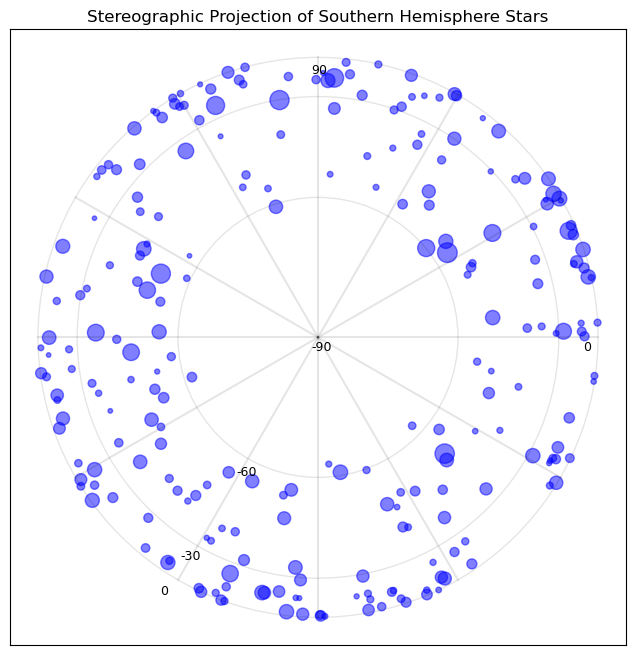

In [8]:
# Starchecker 2 part 2a: Stereographic projection for SOUTHERN hemisphere

# Convert RA and Dec to radians, then to Cartesian coordinates
ra_rad = np.radians(negative_df['RA']*15)
dec_rad = np.radians(negative_df['Dec'])

x = np.cos(ra_rad) * np.cos(dec_rad)
y = np.sin(ra_rad) * np.cos(dec_rad)

# Define the stereographic projection
center_dec = np.radians(90)  # Center of the circle
edge_dec = np.radians(0)      # Edge of the circle

def stereographic_projection(x, y, center_dec, edge_dec):
    x_proj = x / (1 - np.sin(center_dec) * np.sin(edge_dec))
    y_proj = y / (1 - np.sin(center_dec) * np.sin(edge_dec))
    return x_proj, y_proj

x_proj, y_proj = stereographic_projection(x, y, center_dec, edge_dec)

# Plot the stereographic projection with variable point sizes based on magnitude
# Extracting magnitudes and normalizing them
magnitudes = negative_df['Mag']
min_mag = magnitudes.min()
max_mag = magnitudes.max()
normalized_magnitudes = (magnitudes - min_mag) / (max_mag - min_mag)

# Size range for points
min_size = 10
max_size = 200
point_sizes = min_size + (max_size - min_size) * (1 - normalized_magnitudes)

# Add labels
# Create a subplot within a larger figure
fig, ax = plt.subplots(figsize=(8, 8))
# Dec = 0
ax.annotate('0',
            xy=(115, 55), xycoords='figure points',
            fontsize=9)
# Dec = 30
ax.annotate('-30',
            xy=(130, 80), xycoords='figure points',
            fontsize=9)
# Dec = 60
ax.annotate('-60',
            xy=(170, 140), xycoords='figure points',
            fontsize=9)
# Dec = 90
ax.annotate('-90',
            xy=(224, 230), xycoords='figure points',
            fontsize=9)
# RA = 0
ax.annotate('0',
            xy=(420, 230), xycoords='figure points',
            fontsize=9)
# RA = 90
ax.annotate('90',
            xy=(224, 430), xycoords='figure points',
            fontsize=9)

# Plot the stereographic projection on the subplot
ax.scatter(x_proj, y_proj, s=point_sizes, color='blue', alpha=0.5)

# Add RA markers
angles = np.linspace(0, 2 * np.pi, 13)[:-1]
for angle in angles:
    dx = np.cos(angle)
    dy = np.sin(angle)
    ax.plot([0, dx], [0, dy], color='black', alpha=0.1)

# Add Dec markers
circles = [((0, 0), 1),     # Dec = 90
           ((0, 0), 0.86),  # Dec = 30
           ((0, 0), 0.5)]   # Dec = 60

for (center, radius) in circles:
    circle = plt.Circle(center, radius, color='black', fill=False, alpha=0.1)
    ax.add_artist(circle)
    
# Manually plot a point with RA = 0 and Dec = 45 (REMOVE LATER. ONLY HERE FOR TESTING PURPOSES)
ra_rad_point = np.radians(90)  # Convert RA to radians
dec_rad_point = np.radians(75)  # Convert Dec to radians
x_point = np.cos(ra_rad_point) * np.cos(dec_rad_point)
y_point = np.sin(ra_rad_point) * np.cos(dec_rad_point)
x_proj_point, y_proj_point = stereographic_projection(x_point, y_point, center_dec, edge_dec)
#ax.scatter(x_proj_point, y_proj_point, s=100, color='red', marker='+')

ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
ax.set_title('Stereographic Projection of Southern Hemisphere Stars')
ax.set_aspect('equal', adjustable='box')

# Save the figure into desired folder
plt.savefig(f"{path}/StereographicSouthern.png")

# Display the figure with subplot
plt.show()